## Figure 2a ##

This notebook contains the code for reproducing figure 2a. The recreated figures are stored inside the folder 'Fig2_figures'.

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [15]:
file = pd.ExcelFile("Data_Fig2.xlsx")
df = pd.read_excel(file, sheet_name="fig_2a")
df.head() 

,nhp_neuron_id,dist,time_JS_onset,firing_rate,firing_rate_SEM,time_JS_offset,firing_rate_offset,firing_rate_SEM_offset,Unnamed: 8,nhp_neuron_id.1,dist.1,time_JS_onset.1,firing_rate.1,firing_rate_SEM.1,time_JS_offset.1,firing_rate_offset.1
0,amadeus08292019_a neur 2,1.0,0.00,26.380343,0.802575,-0.566667,26.368647,0.810237,NaN,amadeus08152019_a neur 13,1,0.00,10.106168,0.934506,-0.674988,10.217850
1,NaN,1.0,0.04,26.096295,0.759855,-0.526667,26.118283,0.767327,NaN,NaN,1,0.04,10.025653,0.936742,-0.634988,10.151238
2,NaN,1.0,0.08,25.863917,0.789924,-0.486667,25.846370,0.795425,NaN,NaN,1,0.08,9.931412,0.919859,-0.594989,9.977791
3,NaN,1.0,0.12,25.627292,0.823297,-0.446667,25.575625,0.825461,NaN,NaN,1,0.12,9.410395,0.872639,-0.554988,9.321963
4,NaN,1.0,0.16,25.572602,0.867583,-0.406667,25.605062,0.856050,NaN,NaN,1,0.16,8.554685,0.816351,-0.514988,8.444834


### Summary of the data used to reproduce the figure 2a ###
The Excel filecontains precomputed peri-stimulus time histogram (PSTH) data for example neurons. Each row corresponds to a time bin for a particular temporal distance condition. Below is a description of each column.

- **dist**: temporal distance in terms of landmarks used in the paper (1-5) 
- **time_JS_onset**: Time axis (already *scaled and resampled*) aligned to the moment the joystick movement begins. This scaling is performed inside the MATLAB function `plot_scaled_psth`.
- **firing_rate**:For each trial $i$ and time bin $b$, the instantaneous firing rate is:

$$
FR_{i,b} = \frac{\text{number of spikes in bin}}{\text{bin width}}
$$

The PSTH value in this column is the mean across all $N$ trials belonging to the same temporal distance:

$$
FR_{\text{mean}, b} = \frac{1}{N} \sum_{i=1}^{N} FR_{i,b}
$$

- **firing_rate_offset**: Computed exactly like `firing_rate`, but using spike times aligned to joystick offset.
- **firing_rate_SEM**: SEM stands for Standard Error of the Mean.For each time bin, the SEM indicates the uncertainty of the estimated mean firing rate:

$$
SEM_b = \frac{SD_b}{\sqrt{N}}
$$

where $SD_b$ is the sample standard deviation across trials.
- **time_JS_offset**: Time axis aligned to the end of the joystick movement (movement termination).
- **firing_rate_SEM_offset**: same thing but aligned to offset. 

The dataset released on the official Nature page does not include the column  
`firing_rate_SEM_offset` for the second example neuron.  
Therefore, the offset-aligned PSTH for that neuron can only display the mean trace, not the SEM shading.

In [30]:
neuron1_df = df[['dist','time_JS_onset','firing_rate','firing_rate_SEM','time_JS_offset','firing_rate_offset','firing_rate_SEM_offset']].dropna()
neuron2_df = df[['dist.1','time_JS_onset.1','firing_rate.1','firing_rate_SEM.1','time_JS_offset.1','firing_rate_offset.1']].dropna()

neuron2_df = neuron2_df.rename(columns={'dist.1':'dist','firing_rate.1':'firing_rate', 'time_JS_onset.1':'time_JS_onset','firing_rate_SEM.1':'firing_rate_SEM','time_JS_offset.1':'time_JS_offset','firing_rate_offset.1':'firing_rate_offset'})

In [ ]:
def plot_fig2a_single_neuron(neuron_df, title=None, save_path=None):

    """If firing_rate_SEM_offset is present, the shaded SEM 
       for the offset-aligned PSTH will be plotted.
        Otherwise only the mean line"""
    
    distances = sorted(neuron_df["dist"].unique())
    cmap = plt.get_cmap("viridis")
    
    fig, (ax_on, ax_off) = plt.subplots(1, 2, figsize=(7, 3.5), sharey=True)
    has_offset_sem = "firing_rate_SEM_offset" in neuron_df.columns
    
    for i, d in enumerate(distances):
        color = cmap(i / max(len(distances)-1, 1))
        sub = neuron_df[neuron_df["dist"] == d]
        
        # Onset-aligned PSTH
        t_on = sub["time_JS_onset"].values
        fr_on = sub["firing_rate"].values
        sem_on = sub["firing_rate_SEM"].values
        
        ax_on.plot(t_on, fr_on, label=f"dist {d}", color=color, linewidth= 1.5)
        ax_on.fill_between(t_on, fr_on - sem_on, fr_on + sem_on,
                           alpha=0.3, linewidth=0, color=color)
        
        # Offset-aligned PSTH
        t_off = sub["time_JS_offset"].values
        fr_off = sub["firing_rate_offset"].values
        
        ax_off.plot(t_off, fr_off, label=f"dist {d}", color=color, linewidth= 1.5)

        if has_offset_sem:
            sem_off= sub['firing_rate_SEM_offset'].values 
            ax_off.fill_between(t_off, fr_off - sem_off, fr_off + sem_off,
                            alpha=0.3, linewidth=0, color=color)
        
    # Adding ticks every 0.65 seconds to match original image
    tick_spacing = 0.65

    # Onset ticks
    tmin_on = neuron_df["time_JS_onset"].min()
    tmax_on = neuron_df["time_JS_onset"].max()
    ticks_on = np.arange(np.floor(tmin_on / tick_spacing) * tick_spacing,
                         np.ceil(tmax_on / tick_spacing) * tick_spacing + tick_spacing,
                         tick_spacing)

    ax_on.set_xticks(ticks_on)
    ax_on.set_xticklabels([f"{t:.2f}" for t in ticks_on], fontsize=8)

    # Offset ticks
    tmin_off = neuron_df["time_JS_offset"].min()
    tmax_off = neuron_df["time_JS_offset"].max()
    ticks_off = np.arange(np.floor(tmin_off / tick_spacing) * tick_spacing,
                          np.ceil(tmax_off / tick_spacing) * tick_spacing + tick_spacing,
                          tick_spacing)

    ax_off.set_xticks(ticks_off)
    ax_off.set_xticklabels([f"{t:.2f}" for t in ticks_off], fontsize=8)

    # Formatting
    ax_on.axvline(0, color="k", linestyle="--", linewidth=0.8)
    ax_off.axvline(0, color="k", linestyle="--", linewidth=0.8)
    
    ax_on.set_xlabel("Time from joystick onset (s)")
    ax_off.set_xlabel("Time from joystick offset (s)")
    ax_on.set_ylabel("FR (spikes per s)")

    for ax in (ax_on, ax_off):
        
        # Only left & bottom spines like in the paper
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

        # Ticks pointing out, no ticks on top/right
        ax.tick_params(direction="out", length=3, width=0.8,
                       top=False, right=False)
    
    handles, labels = ax_on.get_legend_handles_labels()
    ax_off.legend(
        handles,
        [f"{int(d)}" for d in distances],
        title="Distance",
        frameon=False,
        fontsize=7,
        title_fontsize=8,
        loc="upper left",
        bbox_to_anchor=(1.02, 1.0),
        borderaxespad=0.0,
    )
    

    if title is not None:
        fig.suptitle(title, fontsize= 10)
    
    plt.tight_layout()
    
    if save_path is not None:
        fig.savefig(save_path, dpi=300, bbox_inches="tight")
    
    return fig, (ax_on, ax_off)


<>:3: SyntaxWarning: invalid escape sequence '\F'
<>:3: SyntaxWarning: invalid escape sequence '\F'
C:\Users\frdes\AppData\Local\Temp\ipykernel_22100\2562071146.py:3: SyntaxWarning: invalid escape sequence '\F'
  save_path="Fig2_figures\Fig2a_neuron1.png")


(<Figure size 700x350 with 2 Axes>,
 (<Axes: xlabel='Time from joystick onset (s)', ylabel='FR (spikes per s)'>,
  <Axes: xlabel='Time from joystick offset (s)'>))

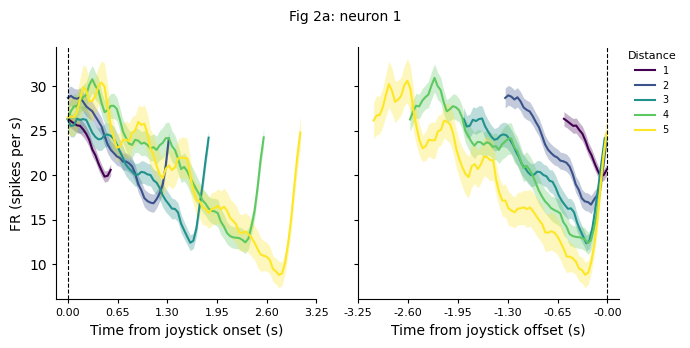

In [45]:
plot_fig2a_single_neuron(neuron1_df,
                         title="Fig 2a: neuron 1",
                         save_path="Fig2_figures\Fig2a_neuron1.png")

<>:3: SyntaxWarning: invalid escape sequence '\F'
<>:3: SyntaxWarning: invalid escape sequence '\F'
C:\Users\frdes\AppData\Local\Temp\ipykernel_22100\1667980832.py:3: SyntaxWarning: invalid escape sequence '\F'
  save_path="Fig2_figures\Fig2a_neuron2.png")


(<Figure size 700x350 with 2 Axes>,
 (<Axes: xlabel='Time from joystick onset (s)', ylabel='FR (spikes per s)'>,
  <Axes: xlabel='Time from joystick offset (s)'>))

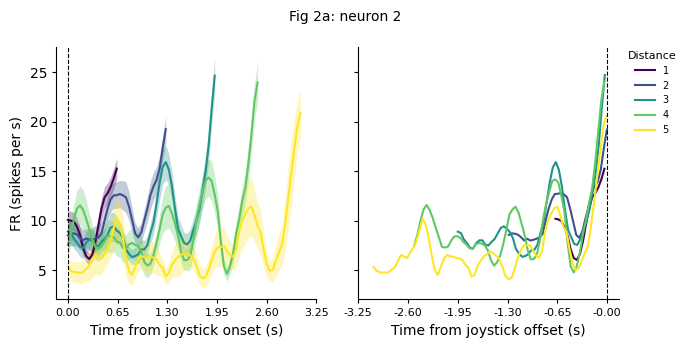

In [47]:
plot_fig2a_single_neuron(neuron2_df,
                         title="Fig 2a: neuron 2",
                         save_path="Fig2_figures\Fig2a_neuron2.png")